### RunKeeper Fitness Data
Runkeeper is a GPS fitness-tracking app for iOS and Android launched in 2008. In late 2011, Runkeeper secured $10 million in a Series B financing, led by Spark Capital.

Dataset contains the information about Persons running , training habits, and achievements, when he suddenly realized that he could take an in-depth analytical look at my training. He had been using a popular GPS fitness tracker called Runkeeper for years and decided it was time to analyze my running data to see how he was doing.

Since 2012, he has been using the Runkeeper app, and it's great. One key feature: its excellent data export. Anyone who has a smartphone can download the app and analyze their data like we will in this notebook. This dataset contains informationa bout the persons heart rate over years when he is doing excercise like Running,cycling, and other.

We applied machine learning algorithms to predict the heart beast of the person by using:
1. Linear Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting

and compared to check which model fits the best.

In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as nm
df_activities=pd.read_csv("C:\\Users\\HP PC\\Downloads\\cardioActivities.csv")
df_activities.head()

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


In [2]:
cols_to_drop = df_activities.drop(columns=['Friend\'s Tagged','Route Name','GPX File','Activity Id', 'Notes'])
cols_to_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 9 columns):
Date                        508 non-null object
Type                        508 non-null object
Distance (km)               508 non-null float64
Duration                    508 non-null object
Average Pace                508 non-null object
Average Speed (km/h)        508 non-null float64
Calories Burned             508 non-null float64
Climb (m)                   508 non-null int64
Average Heart Rate (bpm)    294 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 35.8+ KB


In [3]:
display(cols_to_drop['Type'].value_counts())

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

In [4]:
cols_to_drop['Type'] = cols_to_drop['Type'].str.replace('Other', 'Unicycling')
cols_to_drop.head()

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm)
0,2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,774.0,130,159.0
1,2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,954.0,168,159.0
2,2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,967.0,171,155.0
3,2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,960.0,169,158.0
4,2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,967.0,170,154.0


In [5]:
cols_to_drop.isnull().sum()

Date                          0
Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

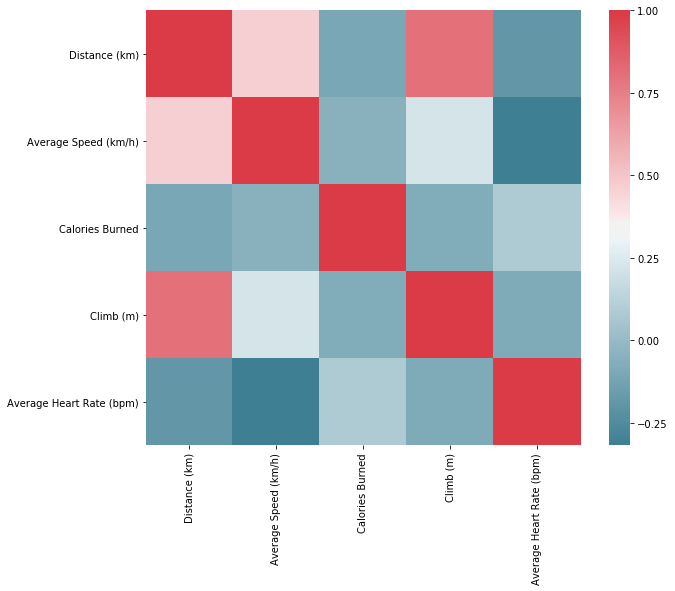

In [6]:
import seaborn as sns
cols_to_drop.corr()

f, ax = pt.subplots(figsize=(10, 8))
corr = cols_to_drop.corr()
sns.heatmap(corr, mask=nm.zeros_like(corr, dtype=nm.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


C:\Users\HP PC\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HP PC\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


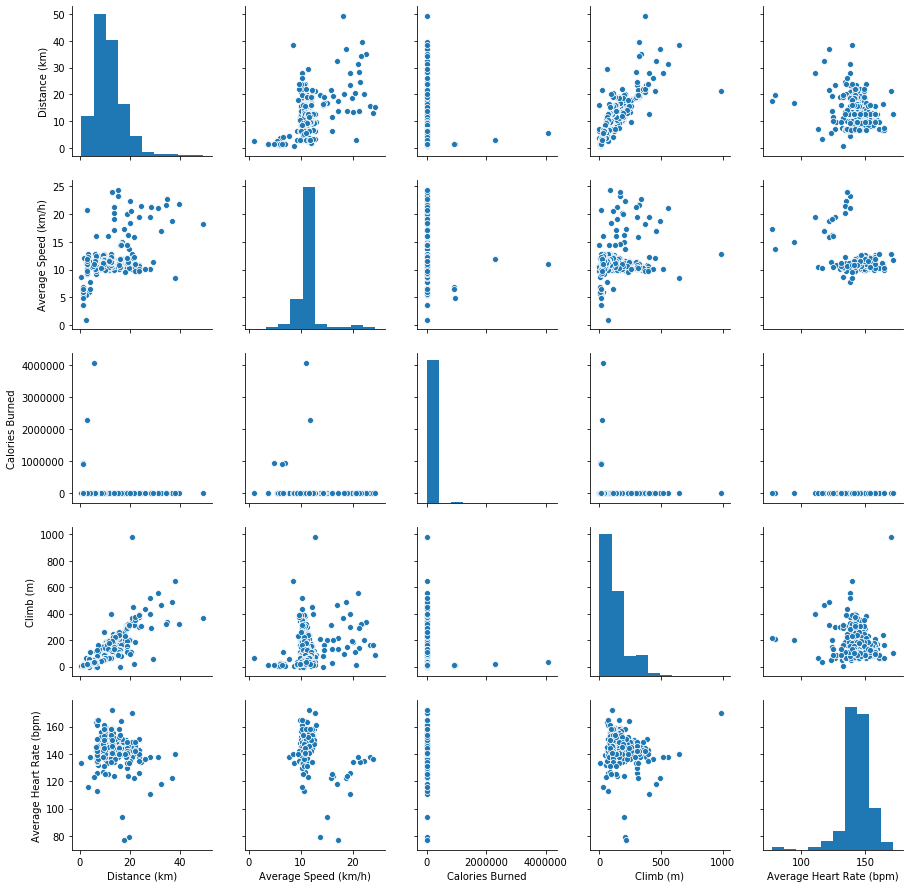

In [25]:
sns.pairplot(cols_to_drop)

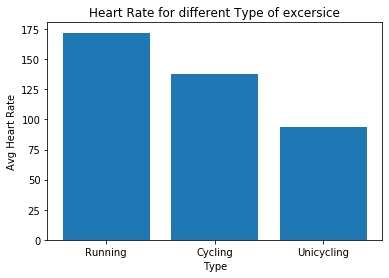

In [7]:

    # this is for plotting purpose
    pt.bar(cols_to_drop['Type'], cols_to_drop['Average Heart Rate (bpm)'])
    pt.xlabel('Type')
    pt.ylabel('Avg Heart Rate')
    #pt.xticks(cols_to_drop['Type'], cols_to_drop['Average Heart Rate (bpm)'], fontsize=5, rotation=30)
    pt.title('Heart Rate for different Type of excersice')
    pt.show()

#### Missing values Imputation

In [8]:
def missing_avg_heartrate(activity):
    avg_hr = cols_to_drop[cols_to_drop['Type'] == activity]['Average Heart Rate (bpm)'].mean()
    df_run = cols_to_drop[cols_to_drop['Type'] == activity ].copy()
    if type(avg_hr) == float and pd.isna(avg_hr):
        df_run['Average Heart Rate (bpm)'].fillna(110, inplace=True)
    else:
        df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr), inplace=True)
    return df_run;

run_sum=missing_avg_heartrate('Running')
walk_sum=missing_avg_heartrate('Walking')
cyc_sum=missing_avg_heartrate('Cycling')


reg_data=pd.concat([run_sum,walk_sum,cyc_sum])

time_series_data=reg_data

#### Creating Dummy variables for Type
we can see that tere are 3 factors in type variables and we can create dummy variable to use this later in ur model

In [9]:
reg_data=pd.get_dummies(reg_data,columns=['Type'])
reg_data.head()

,Date,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Type_Cycling,Type_Running,Type_Walking
0,2018-11-11 14:05:12,10.44,58:40,5:37,10.68,774.0,130,159.0,0,1,0
1,2018-11-09 15:02:35,12.84,1:14:12,5:47,10.39,954.0,168,159.0,0,1,0
2,2018-11-04 16:05:00,13.01,1:15:16,5:47,10.37,967.0,171,155.0,0,1,0
3,2018-11-01 14:03:58,12.98,1:14:25,5:44,10.47,960.0,169,158.0,0,1,0
4,2018-10-27 17:01:36,13.02,1:12:50,5:36,10.73,967.0,170,154.0,0,1,0


In [10]:
reg_data=reg_data.drop(['Date','Duration','Average Pace'], axis=1)
reg_data.head()

,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Type_Cycling,Type_Running,Type_Walking
0,10.44,10.68,774.0,130,159.0,0,1,0
1,12.84,10.39,954.0,168,159.0,0,1,0
2,13.01,10.37,967.0,171,155.0,0,1,0
3,12.98,10.47,960.0,169,158.0,0,1,0
4,13.02,10.73,967.0,170,154.0,0,1,0


In [11]:
reg_data.dtypes

Distance (km)               float64
Average Speed (km/h)        float64
Calories Burned             float64
Climb (m)                     int64
Average Heart Rate (bpm)    float64
Type_Cycling                  uint8
Type_Running                  uint8
Type_Walking                  uint8
dtype: object

#### Linear Regression model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
y=reg_data.drop(columns=['Distance (km)','Average Speed (km/h)','Calories Burned', 'Climb (m)','Type_Cycling','Type_Running','Type_Walking'])
x=reg_data.drop('Average Heart Rate (bpm)',axis=1)
X = x.apply(pd.to_numeric, errors='coerce')
Y = y.apply(pd.to_numeric, errors='coerce')

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


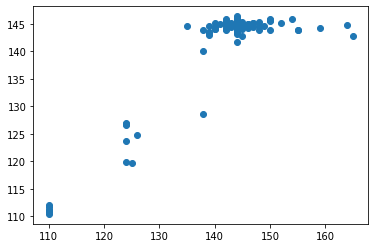

In [35]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 42)
model=lm().fit(xTrain,yTrain)
predictions=model.predict(xTest)
pt.scatter(yTest,predictions)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
print("Coefficients(slope of the line):", model.coef_)
print("Mean squared error: %.2f"% mean_squared_error(yTest,predictions))
print("R-square: %.2f" % r2_score(yTest,predictions))

Coefficients(slope of the line): [[-9.34253841e-02  1.38994829e+00 -1.94581904e-07  9.17498115e-03
  -1.24777530e+01  1.94201083e+01 -6.94235534e+00]]
Mean squared error: 21.94
R-square: 0.80


#### Decision tree model

In [36]:
from sklearn.tree import DecisionTreeRegressor
rg=DecisionTreeRegressor(random_state=0)
rg.fit(xTrain,yTrain)
rg_predictions=rg.predict(xTest)

print("Coefficients(slope of the line):", model.coef_)
print("Mean squared error: %.2f"% mean_squared_error(yTest,rg_predictions))
print("R-square: %.2f" % r2_score(yTest,rg_predictions))

Coefficients(slope of the line): [[-9.34253841e-02  1.38994829e+00 -1.94581904e-07  9.17498115e-03
  -1.24777530e+01  1.94201083e+01 -6.94235534e+00]]
Mean squared error: 67.86
R-square: 0.37


#### Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor(n_estimators=10,random_state=0)
rd.fit(xTrain,yTrain)
rd_predictions=rd.predict(xTest)

print("Coefficients(slope of the line):", model.coef_)
print("Mean squared error: %.2f"% mean_squared_error(yTest,rd_predictions))
print("R-square: %.2f" % r2_score(yTest,rd_predictions))

Coefficients(slope of the line): [[-9.34253841e-02  1.38994829e+00 -1.94581904e-07  9.17498115e-03
  -1.24777530e+01  1.94201083e+01 -6.94235534e+00]]
Mean squared error: 27.43
R-square: 0.75


C:\Users\HP PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


#### Gradient Boosting model

In [41]:
from sklearn import ensemble
params = {
    'n_estimators': 1,
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse'
}

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

gradient_boosting_regressor.fit(xTrain,yTrain)
gd_predictions=gradient_boosting_regressor.predict(xTest)

print("Coefficients(slope of the line):", model.coef_)
print("Mean squared error: %.2f"% mean_squared_error(yTest,gd_predictions))
print("R-square: %.2f" % r2_score(yTest,gd_predictions))

Coefficients(slope of the line): [[-9.34253841e-02  1.38994829e+00 -1.94581904e-07  9.17498115e-03
  -1.24777530e+01  1.94201083e+01 -6.94235534e+00]]
Mean squared error: 30.47
R-square: 0.72


C:\Users\HP PC\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
